# K-Nearest Neighbor
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Nearest Neighbor** algorithm
- play with the hyperparameter K 
- try KNN on **real-world data**, i.e. the CAPTCHA of a website in ZJU

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [64]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### KNN experiment with hyperparameter K

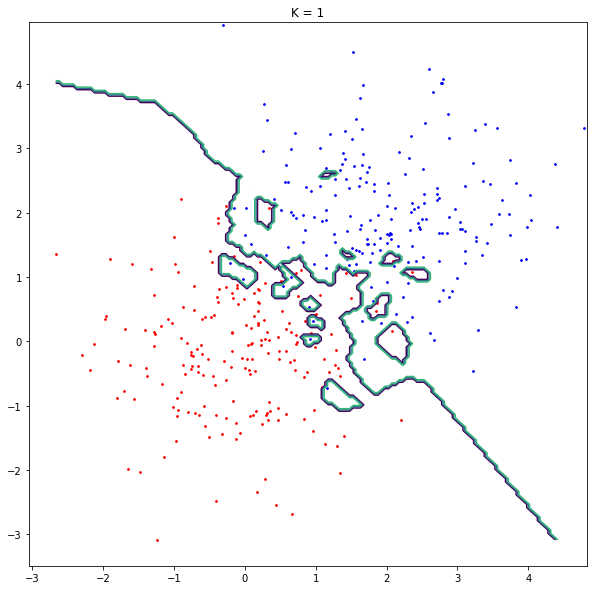

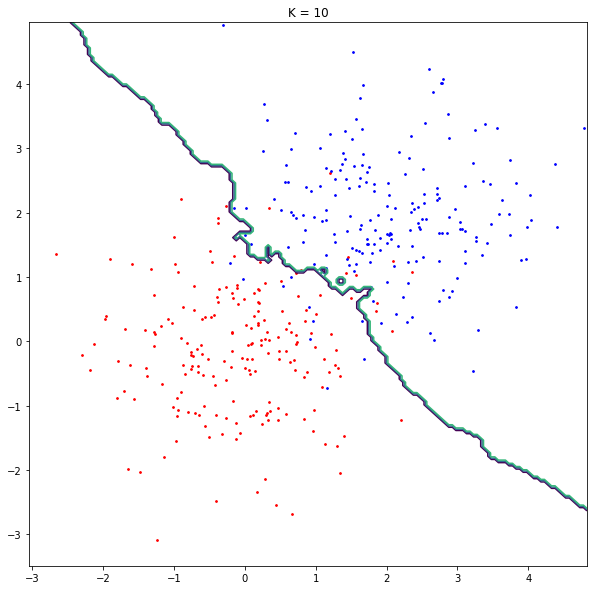

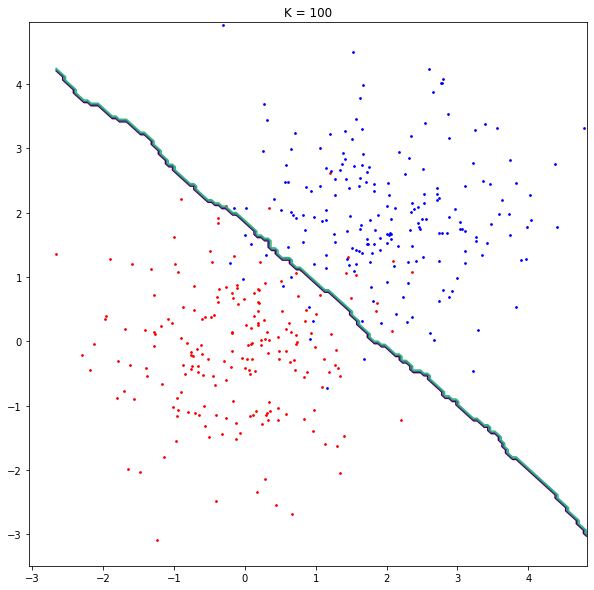

In [65]:
from mkdata import mkdata
from knn_plot import knn_plot

[X, y] = mkdata()

K = [1, 10, 100]
for k in K:
    knn_plot(X, y, k)

### Now Let's hack the website http://cwcx.zju.edu.cn/WFManager/login.jsp

In [66]:
from hack import hack
from extract_image import extract_image
from show_image import show_image
from glob import glob

In [67]:
# Generate the training dataset
# YOU can SKIP this procedure since the .npz has already been created
# NOTE: The return format of glob function may differs between different systems
training_imgs = glob('./training/*.png')
training_x = None
training_y = []
for cur_img_name in training_imgs:
    x = extract_image(cur_img_name)
    cur_label = cur_img_name.split('.png')[0].split('\\')[1]

    for s in cur_label:
        training_y.append(int(s))
    if(training_x is None):
        training_x = x
    else:
        training_x = np.vstack((training_x, x))
    

training_y = np.array(training_y).reshape(len(training_y), 1)
print(training_x.shape, training_y.shape)
np.savez('hack_data.npz', x_train = training_x, y_train = training_y)

(96, 144) (96, 1)


[[5 8 1 2]]


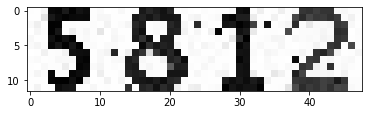

In [68]:
test_img = './5812.png'  # change it yourself
x = extract_image(test_img)
show_image(x)
pred_output = hack(test_img)
print(pred_output)